In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Activation, Dense, Dropout, Flatten, Conv2D, MaxPool2D

from sklearn.model_selection import train_test_split
import random
from tensorflow.keras.utils import to_categorical

In [2]:
import cv2
import os
import glob
import gc

def lire_images(img_dir, xdim, ydim, nmax=5000) :
    label = 0
    label_names = []
    X = []
    y=[]
    print(os.listdir(img_dir))
    for dirname in os.listdir(img_dir):
        print(dirname)
        if dirname != ".DS_Store":
            label_names.append(dirname)
            data_path = img_dir + "/" + dirname + "/*"
            # print(data_path)
            files = glob.glob(data_path)
            for i, f1 in enumerate(files):
                img = cv2.imread(f1) 
                img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
                img = cv2.resize(img, (xdim,ydim)) 
                X.append(np.array(img)) 
                y.append(label) 
            print(i+1,'images')
            label += 1
    X = np.array(X)
    y = np.array(y)
    gc.collect() 
    return X,y, label, label_names

In [3]:
X_train,y_train,Nombre_classes,Classes = lire_images("../ISIC_data/Train", 224, 224, 1000)

['melanoma', 'pigmented benign keratosis', 'nevus', 'basal cell carcinoma', 'actinic keratosis', 'squamous cell carcinoma', 'vascular lesion', 'seborrheic keratosis', 'dermatofibroma']
melanoma
438 images
pigmented benign keratosis
462 images
nevus
357 images
basal cell carcinoma
376 images
actinic keratosis
114 images
squamous cell carcinoma
181 images
vascular lesion
139 images
seborrheic keratosis
77 images
dermatofibroma
95 images


In [4]:
X_test,y_test,Nombre_classes,Classes = lire_images("../ISIC_data/Test", 224, 224,1000)

['.DS_Store', 'melanoma', 'pigmented benign keratosis', 'nevus', 'basal cell carcinoma', 'actinic keratosis', 'squamous cell carcinoma', 'vascular lesion', 'seborrheic keratosis', 'dermatofibroma']
.DS_Store
melanoma
16 images
pigmented benign keratosis
16 images
nevus
16 images
basal cell carcinoma
16 images
actinic keratosis
16 images
squamous cell carcinoma
16 images
vascular lesion
3 images
seborrheic keratosis
3 images
dermatofibroma
16 images


In [5]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)
print(Nombre_classes)

(2239, 224, 224, 3)
(2239,)
(118, 224, 224, 3)
(118,)
9


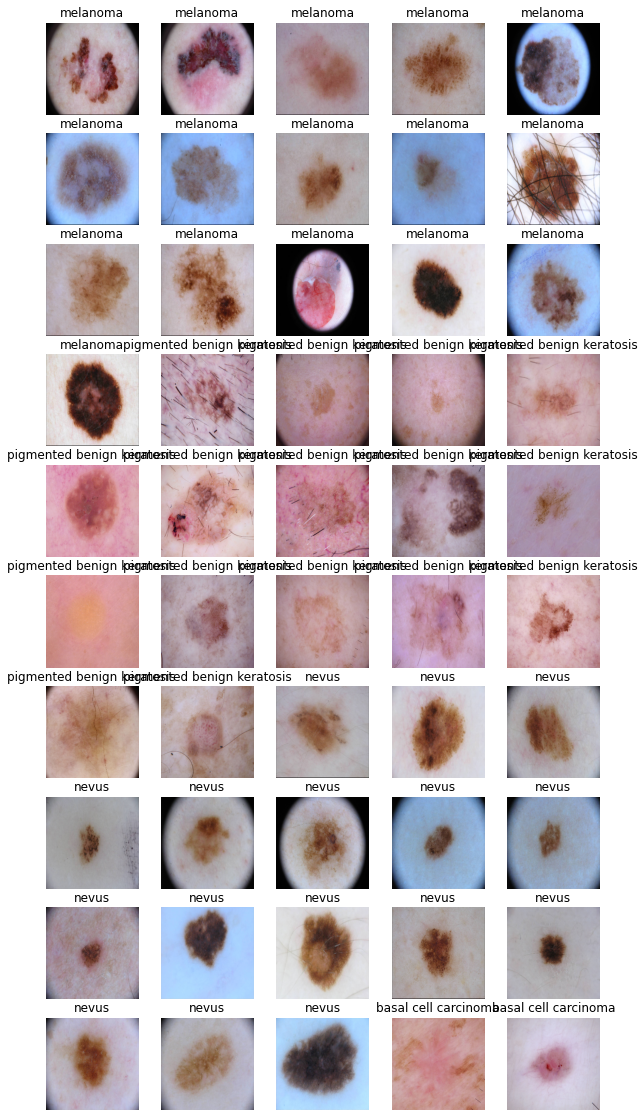

In [6]:
plt.figure(figsize=(10,20))
for i in range(0,50) :
    plt.subplot(10,5,i+1)
    plt.axis('off')
    plt.imshow(X_test[i])
    plt.title(Classes[int(y_test[i])])

In [7]:
X_train = X_train / 255
X_test = X_test / 255
y_train = to_categorical(y_train)
y_test = to_categorical(y_test)

In [8]:
print(X_train.shape)
print(X_test.shape)
print(y_train[0, :])
print(y_test[0, :])
print(y_train[2000, :])
print(y_test[100, :])

(2239, 224, 224, 3)
(118, 224, 224, 3)
[1. 0. 0. 0. 0. 0. 0. 0. 0.]
[1. 0. 0. 0. 0. 0. 0. 0. 0.]
[0. 0. 0. 0. 0. 0. 1. 0. 0.]
[0. 0. 0. 0. 0. 0. 0. 1. 0.]


In [12]:
temp = list(zip(X_train, y_train))
random.shuffle(temp)
X_train, y_train = zip(*temp)
X_train, y_train = np.array(X_train), np.array(y_train)

In [13]:
temp = list(zip(X_test, y_test))
random.shuffle(temp)
X_test, y_test = zip(*temp)
X_test, y_test = np.array(X_test), np.array(y_test)

In [17]:
model_cnn = Sequential()

model_cnn.add(Conv2D(8, 3, 1, padding="same", activation="relu", name="block1_conv1"))
model_cnn.add(Dropout(0.3))
model_cnn.add(Conv2D(8, 3, 1, padding="same", activation="relu", name="block1_conv2"))
model_cnn.add(Dropout(0.3))
model_cnn.add(MaxPool2D(2))
# Block 2
model_cnn.add(Conv2D(32, 3, 1, padding="same", activation="relu", name="block2_conv1"))
model_cnn.add(Dropout(0.3))
model_cnn.add(Conv2D(32, 3, 1, padding="same", activation="relu", name="block2_conv2"))
model_cnn.add(Dropout(0.3))
model_cnn.add(MaxPool2D(2))
# Block 3
model_cnn.add(Conv2D(64, 3, 1, padding="same", activation="relu", name="block3_conv1"))
model_cnn.add(Dropout(0.3))
model_cnn.add(Conv2D(64, 3, 1, padding="same", activation="relu", name="block3_conv2"))
model_cnn.add(Dropout(0.3))
model_cnn.add(Conv2D(64, 3, 1, padding="same", activation="relu", name="block3_conv3"))
model_cnn.add(Dropout(0.3))
model_cnn.add(MaxPool2D(2))
# Block 4
model_cnn.add(Conv2D(128, 3, 1, padding="same", activation="relu", name="block4_conv1"))
model_cnn.add(Dropout(0.3))
model_cnn.add(Conv2D(128, 3, 1, padding="same", activation="relu", name="block4_conv2"))
model_cnn.add(Dropout(0.3))
model_cnn.add(Conv2D(128, 3, 1, padding="same", activation="relu", name="block4_conv3"))
model_cnn.add(MaxPool2D(2))
# Block 5
model_cnn.add(Conv2D(256, 3, 1, padding="same", activation="relu", name="block5_conv1"))
model_cnn.add(Dropout(0.3))
model_cnn.add(Conv2D(256, 3, 1, padding="same", activation="relu", name="block5_conv2"))
model_cnn.add(Dropout(0.3))
model_cnn.add(Conv2D(256, 3, 1, padding="same", activation="relu", name="block5_conv3"))
model_cnn.add(Dropout(0.3))
model_cnn.add(MaxPool2D(2))

# Dense Layers for Classification
model_cnn.add(Flatten())
model_cnn.add(Dense(256, activation='relu', name='dense1'))
model_cnn.add(Dense(64, activation='relu', name='dense2'))
model_cnn.add(Dense(9, activation='softmax', name='dense3'))

model_cnn.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [18]:
train_cnn = model_cnn.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100, batch_size=200, verbose=1)

model_cnn.summary()

Epoch 1/100
 2/12 [====>.........................] - ETA: 9:23 - loss: 2.5615 - categorical_accuracy: 0.1562 

In [ ]:
scores = model_cnn.evaluate(X_test, y_test, verbose=0)
print("Score : %.2f%%" % (scores[1]*100))